In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline
pd.set_option("display.max_columns",None)
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv("./datasets/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.drop("Id",axis=1, inplace=True)
df.columns = ["sepal_length","sepal_width","petal_length","petal_width","species"]
df.shape

(150, 5)

In [5]:
df2 = df.replace("Iris-setosa","setosa")
df2.replace("Iris-virginica","virginica", inplace=True)
df2.replace("Iris-versicolor","versicolor", inplace = True)
df2.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [6]:
df.groupby("species").agg(["min","mean","max"]).T

species            Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length min         4.300            4.900           4.900
             mean        5.006            5.936           6.588
             max         5.800            7.000           7.900
sepal_width  min         2.300            2.000           2.200
             mean        3.418            2.770           2.974
             max         4.400            3.400           3.800
petal_length min         1.000            3.000           4.500
             mean        1.464            4.260           5.552
             max         1.900            5.100           6.900
petal_width  min         0.100            1.000           1.400
             mean        0.244            1.326           2.026
             max         0.600            1.800           2.500

## Univariate Analysis

In [7]:
df_setosa = df2.loc[df["species"] == "setosa"]
df_virginica = df2.loc[df["species"] == "virginica"]
df_versicolor = df2.loc[df["species"] == "versicolor"]

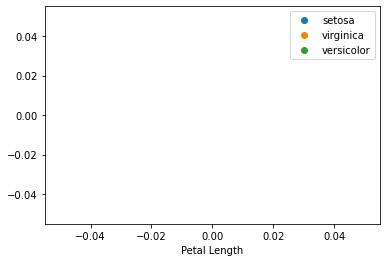

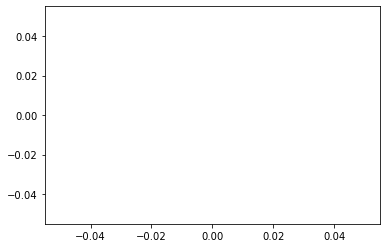

In [8]:
attribute = "sepal_length"
plt.plot(df_setosa[attribute], np.zeros_like(df_setosa[attribute]),"o", label="setosa")
plt.plot(df_virginica[attribute], np.zeros_like(df_virginica[attribute]),"o",label="virginica")
plt.plot(df_versicolor[attribute], np.zeros_like(df_versicolor[attribute]),"o",label="versicolor")

plt.xlabel("Petal Length")
plt.legend()
plt.show()
plt.plot(df_setosa["sepal_length"])
plt.show()

## Bivariate Analysis

D:\Setups\Anaconda\Setup\envs\tensor\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


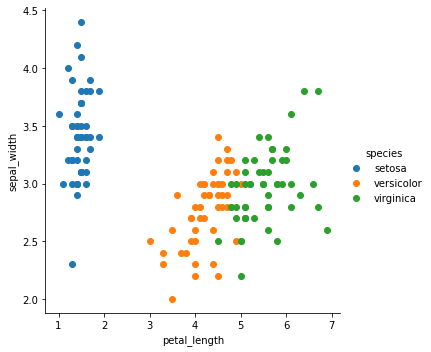

In [9]:
sns.FacetGrid(df2, hue="species", size=5).map(plt.scatter, "petal_length","sepal_width").add_legend()
plt.show()

In [10]:
## from this we can classify setosa using some linear classifier like logistic, but there are some points merging for versicolor and virginica, but at the very least they can also be classified using linear classifier

## Multivariate Analysis

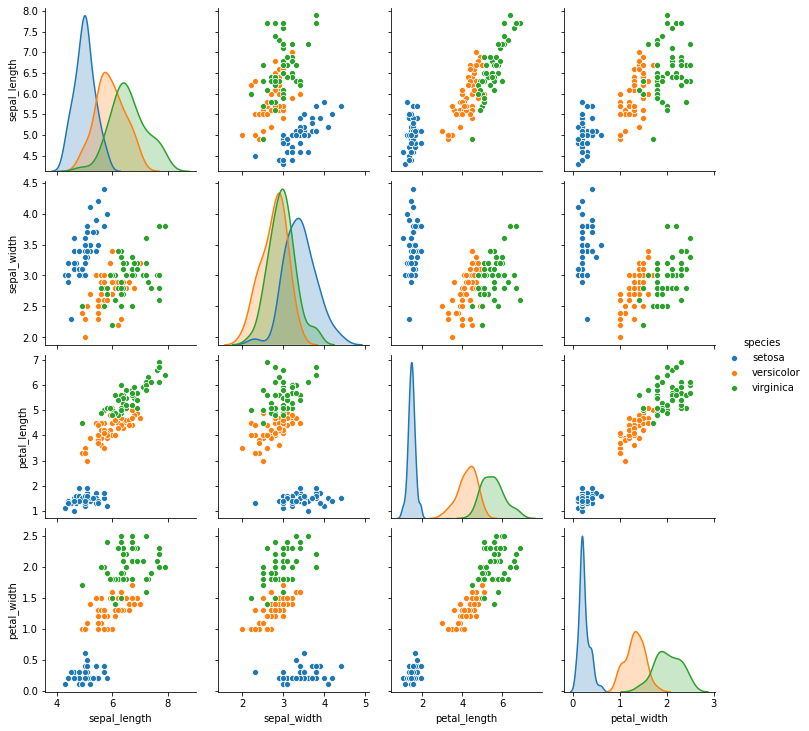

In [11]:
sns.pairplot(df2, hue="species") # hue - wrt to what (output)
plt.show()

## Correlation Analysis

In [19]:
df2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


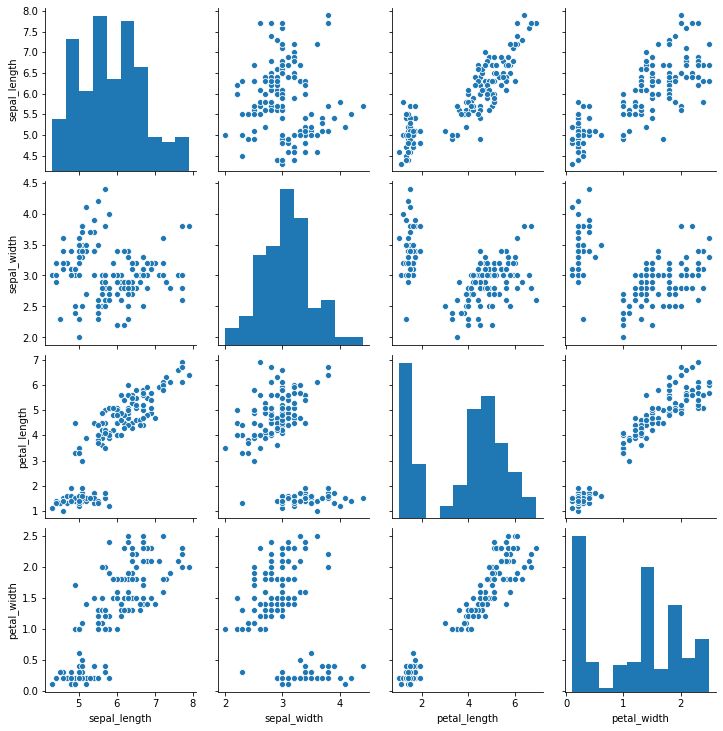

In [21]:
sns.pairplot(df2)
plt.show()

In [22]:
## We can see some linear relationship between attributes

## Train Test Split

In [12]:
X = df2.drop("species", axis=1)
y = df2["species"]

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (150, 4)
Shape of y:  (150,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=2020)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (120, 4)
Shape of X_test:  (30, 4)
Shape of y_train:  (120,)
Shape of y_test:  (30,)


## Modelling

In [14]:
model_dict = {1:"Support Vector Machine", 2: "Decision Tree", 3: "Random Forest", 4: "KNN", 5: "Naive Bayes"}
def model(X_train, y_train, X_test, y_test):
    
    # Logistic Regression
#     logistic_classifier = LogisticRegression()
#     logistic_classifier.fit(X_train,y_train)
#     logistic_classifier_score = logistic_classifier.score(X_test, y_test)
#     print("Logistic Regression Accuracy: ", logistic_classifier_score * 100)
    
    # Support Vector Classification
    sv_classifier = SVC(kernel="rbf")
    sv_classifier.fit(X_train,y_train)
    sv_classifier_score = sv_classifier.score(X_test, y_test)
    print("Support Vector Machine Accuracy: ", sv_classifier_score * 100)
    
    ## Decision Tree
    dt_classifier = DecisionTreeClassifier(criterion="gini")
    dt_classifier.fit(X_train,y_train)
    dt_classifier_score = dt_classifier.score(X_test, y_test)
    print("Decision Tree Accuracy: ", dt_classifier_score * 100)
    
    ## Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=100, criterion="gini")
    rf_classifier.fit(X_train,y_train)
    rf_classifier_score = rf_classifier.score(X_test, y_test)
    print("Random Forest Accuracy: ", rf_classifier_score * 100)
    
    ## KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train,y_train)
    knn_classifier_score = knn_classifier.score(X_test, y_test)
    print("KNN Accuracy: ", knn_classifier_score * 100)
    
    ## Naive Bayes
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train,y_train)
    naive_classifier_score = naive_classifier.score(X_test, y_test)
    print("Naive Bayes Accuracy: ", naive_classifier_score * 100)
    
    return sv_classifier, dt_classifier, rf_classifier, knn_classifier, naive_classifier

In [15]:
models = model(X_train, y_train, X_test, y_test)
models

Support Vector Machine Accuracy:  86.66666666666667
Decision Tree Accuracy:  86.66666666666667
Random Forest Accuracy:  83.33333333333334
KNN Accuracy:  90.0
Naive Bayes Accuracy:  83.33333333333334


(SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 GaussianNB())

## Testing

In [16]:
def prediciton(X_test ,models, model_dict):
    print("Models Predictions:\n")
    for i,model in enumerate(models):
        prediction = model.predict([X_test])
        print(f"{model_dict[i+1]} Predicton: {prediction[0]}")

In [17]:
y_test.iloc[1]

'setosa'

In [18]:
## Testing

index = 1
test = X_test.iloc[index]

prediciton(test, models, model_dict)
print("\nActual Value: ", y_test.iloc[index])

Models Predictions:

Support Vector Machine Predicton: setosa
Decision Tree Predicton: setosa
Random Forest Predicton: setosa
KNN Predicton: setosa
Naive Bayes Predicton: setosa

Actual Value:  setosa
